
Develop an anomaly detection system for high-dimensional network traffic data using the KDD Cup 1999 dataset.


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.10      0.18    100655

    accuracy                           0.10    100655
   macro avg       0.50      0.05      0.09    100655
weighted avg       1.00      0.10      0.18    100655



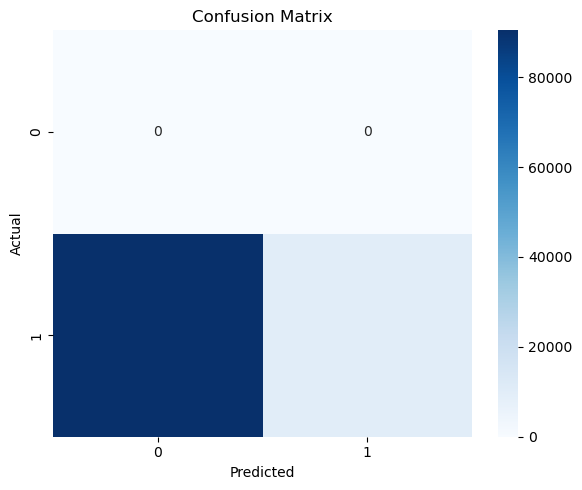

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_kddcup99
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
data = fetch_kddcup99(subset='SA', percent10=True, as_frame=True)
df = data.frame.copy()

# Step 2: Preprocessing
# Encode categorical features (protocol_type, service, flag)


# Step 3: Separate features and labels
X = df.drop(columns='labels')
y = df['labels'].apply(lambda x: 0 if x == b'normal.' else 1)

  # 0: normal, 1: anomaly

# Step 4: Feature scaling
X_scaled = StandardScaler().fit_transform(X)

# Step 5: Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X_scaled)

# Step 6: Predict (convert output to match label format)
y_pred = model.predict(X_scaled)
y_pred = np.where(y_pred == 1, 0, 1)  # 1 = anomaly, 0 = normal

# Step 7: Evaluation
print("Classification Report:\n", classification_report(y, y_pred))

# Step 8: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
